In [21]:
import javalang
import networkx as nx
from javalang.ast import Node
from matplotlib import pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
def parse(x):
     tokens = javalang.tokenizer.tokenize(x)
     parser = javalang.parser.Parser(tokens)
     tree = parser.parse_member_declaration()
     return tree

In [3]:
def get_token(node):
    token = ''
    if isinstance(node, str):
        token = node
    elif isinstance(node, set):
        token = 'Modifier'#node.pop()
    elif isinstance(node, Node):
        token = node.__class__.__name__

    return token

def get_children(root):
    if isinstance(root, Node):
        children = root.children
    elif isinstance(root, set):
        children = list(root)
    else:
        children = []

    def expand(nested_list):
        for item in nested_list:
            if isinstance(item, list):
                for sub_item in expand(item):
                    yield sub_item
            elif item:
                yield item

    return list(expand(children))

In [4]:
tree = parse("""
    public int add(int a, int b) {
        int c = 0;
        c = a + b;
        return c;
    }
""")

In [5]:
childs = get_children(tree)

In [6]:
def get_sequence(node, sequence, parent=None):
    token, children = get_token(node), get_children(node)
    sequence.append(token)
    if parent is not None:
        g.add_edge(parent, token)

    for child in children:
        get_sequence(child, sequence, token)

    if token in ['ForStatement', 'WhileStatement', 'DoStatement','SwitchStatement', 'IfStatement']:
        sequence.append('End')


In [7]:
g = nx.DiGraph()
seq = []
get_sequence(tree, seq)

In [8]:
g.edges()

OutEdgeView([('MethodDeclaration', 'Modifier'), ('MethodDeclaration', 'BasicType'), ('MethodDeclaration', 'add'), ('MethodDeclaration', 'FormalParameter'), ('MethodDeclaration', 'LocalVariableDeclaration'), ('MethodDeclaration', 'StatementExpression'), ('MethodDeclaration', 'ReturnStatement'), ('Modifier', 'public'), ('BasicType', 'int'), ('FormalParameter', 'BasicType'), ('FormalParameter', 'a'), ('FormalParameter', 'b'), ('LocalVariableDeclaration', 'BasicType'), ('LocalVariableDeclaration', 'VariableDeclarator'), ('VariableDeclarator', 'c'), ('VariableDeclarator', 'Literal'), ('Literal', '0'), ('StatementExpression', 'Assignment'), ('Assignment', 'MemberReference'), ('Assignment', 'BinaryOperation'), ('Assignment', '='), ('MemberReference', 'c'), ('MemberReference', 'a'), ('MemberReference', 'b'), ('BinaryOperation', '+'), ('BinaryOperation', 'MemberReference'), ('ReturnStatement', 'MemberReference')])

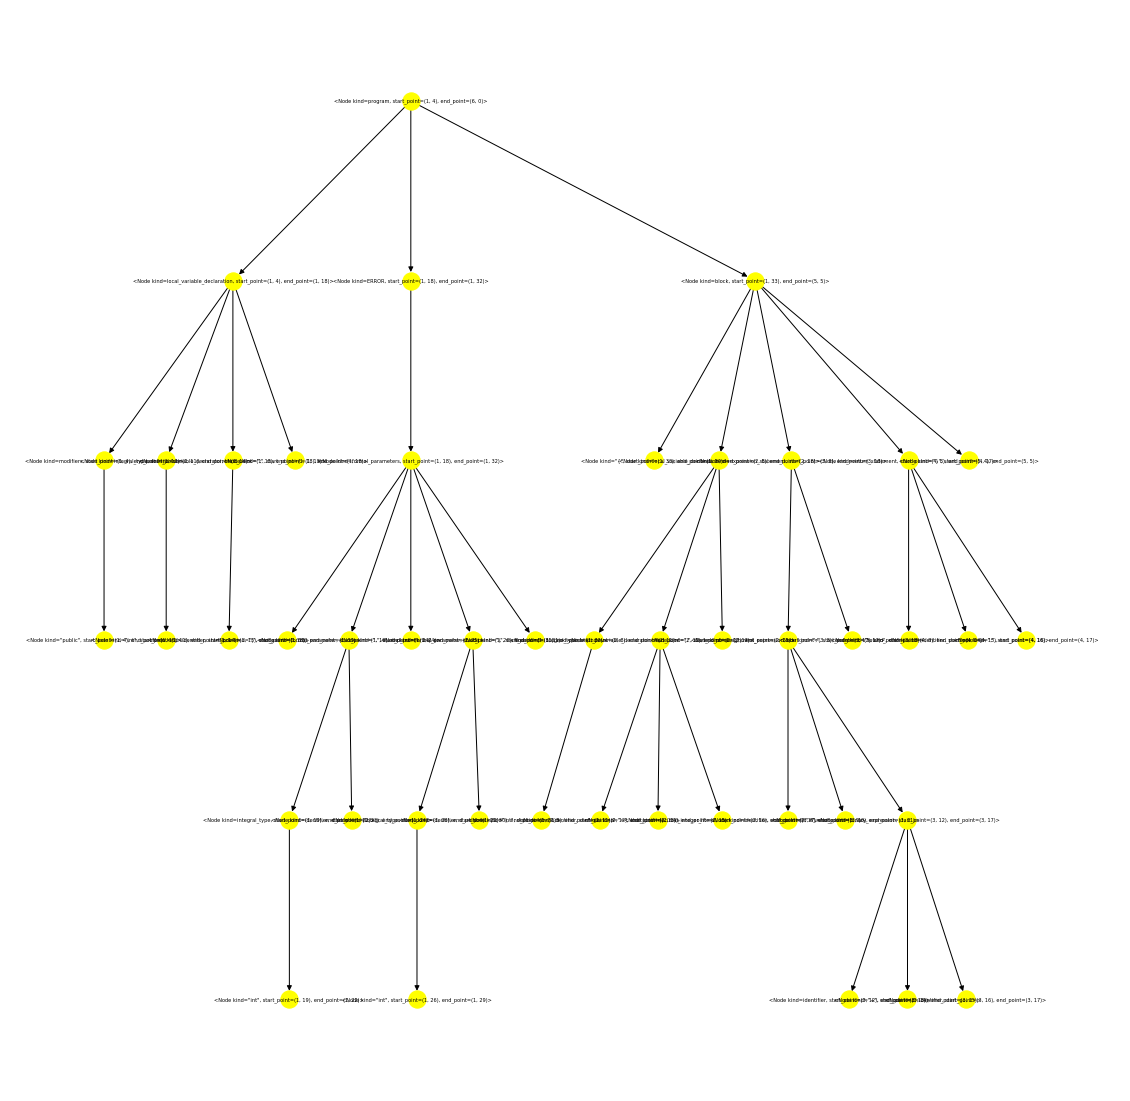

In [58]:
# Plot trees
pos=graphviz_layout(g, prog='dot')
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
nx.draw(g, pos, ax=ax, with_labels=True, arrows=True, font_size=5, node_color="yellow")

In [10]:
spicy = nx.to_scipy_sparse_matrix(g, format='coo')

In [11]:
data = (spicy.row, spicy.col)

In [12]:
data

(array([ 0,  0,  0,  0,  0,  0,  0,  1,  3,  6,  6,  6,  9,  9, 10, 10, 12,
        14, 15, 15, 15, 16, 16, 16, 17, 17, 20], dtype=int32),
 array([ 1,  3,  5,  6,  9, 14, 20,  2,  4,  3,  7,  8,  3, 10, 11, 12, 13,
        15, 16, 17, 19, 11,  7,  8, 18, 16, 16], dtype=int32))

In [46]:
from tree_sitter import Language, Parser, Node

Language.build_library(
  # Store the library in the `build` directory
  'build/my-languages.so',

  # Include one or more languages
  [
    'tree-sitter-java'
  ]
)
JAVA_LANGUAGE = Language('build/my-languages.so', 'java')
parser = Parser()
parser.set_language(JAVA_LANGUAGE)

In [35]:
tree = parser.parse(bytes("""
    public int add(int a, int b) {
        int c = 0;
        c = a + b;
        return c;
    }
""", "utf8"))

In [27]:
tree

In [31]:
cursor = tree.walk()

In [32]:
while cursor.goto_next_sibling():
    print(cursor.node.type)
    while cursor.goto_first_child():
        print(cursor.node.type)


In [54]:
g = nx.DiGraph()

queue = [tree.root_node]
while len(queue) > 0:
    node: Node = queue.pop()
    if hasattr(node, 'children'):
        for child in node.children:
            g.add_edge(str(node), str(child))
            queue.append(child)

In [49]:
g.nodes

NodeView(('<Node kind=program, start_point=(1, 4), end_point=(6, 0)>', '<Node kind=local_variable_declaration, start_point=(1, 4), end_point=(1, 18)>', '<Node kind=ERROR, start_point=(1, 18), end_point=(1, 32)>', '<Node kind=block, start_point=(1, 33), end_point=(5, 5)>', '<Node kind="{", start_point=(1, 33), end_point=(1, 34)>', '<Node kind=local_variable_declaration, start_point=(2, 8), end_point=(2, 18)>', '<Node kind=expression_statement, start_point=(3, 8), end_point=(3, 18)>', '<Node kind=return_statement, start_point=(4, 8), end_point=(4, 17)>', '<Node kind="}", start_point=(5, 4), end_point=(5, 5)>', '<Node kind="return", start_point=(4, 8), end_point=(4, 14)>', '<Node kind=identifier, start_point=(4, 15), end_point=(4, 16)>', '<Node kind=";", start_point=(4, 16), end_point=(4, 17)>', '<Node kind=assignment_expression, start_point=(3, 8), end_point=(3, 17)>', '<Node kind=";", start_point=(3, 17), end_point=(3, 18)>', '<Node kind=identifier, start_point=(3, 8), end_point=(3, 9)>

In [38]:
tree = parser.parse(bytes("""
    public int add(int a, int b) {
        int c = 0;
        c = a + b;
        return c;
    }
""", "utf8"))

In [39]:
tree

In [40]:
cursor = tree.walk()

In [42]:
while cursor.goto_next_sibling():
    while cursor.goto_first_child():
        print(cursor.node.type)


'program'